# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.2685,  0.266 ,  0.0211,  0.7514,  0.457 ,  0.8487,  0.4617,  0.2624,  0.9681,  0.8388,
        0.4249,  0.1006,  0.0668,  0.1442,  0.108 ,  0.6886,  0.0075,  0.0281,  0.5302,  0.2453,
        0.8001,  0.8074,  0.2946,  0.253 ,  0.2443,  0.165 ,  0.8535,  0.7112,  0.7474,  0.3104])

In [6]:
y

array([  8.8054,   8.7981,   8.0634,  10.2542,   9.3711,  10.546 ,   9.3851,   8.7872,  10.9042,
        10.5164,   9.2746,   8.3019,   8.2005,   8.4327,   8.3241,  10.0657,   8.0225,   8.0842,
         9.5905,   8.7358,  10.4004,  10.4221,   8.8837,   8.7591,   8.733 ,   8.4949,  10.5606,
        10.1337,  10.2423,   8.9313])

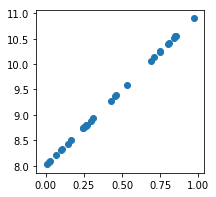

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.7715

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani